<a href="https://colab.research.google.com/github/shinchacoffee/CIFAR10_practice/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

In [12]:
random_seed=1
train_batch_size=100
test_batch_size=1000
torch.manual_seed(random_seed)

In [78]:
train_norm_load = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = True,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor()
                                            ]),
                                            download = True),
                            batch_size=train_batch_size, shuffle = True)

Files already downloaded and verified


In [79]:
RGB_sum = torch.zeros(3)
RGB_sum_sq = torch.zeros(3)
for x,y in train_norm_load:
  RGB_sum += torch.mean(x, dim=(0,2,3))#*x.shape[0]
  RGB_sum_sq += torch.mean(x*x, dim=(0,2,3))#*x.shape[0]
RGB_mean = RGB_sum / len(train_norm_load)
RGB_std  = (RGB_sum_sq / len(train_norm_load) - RGB_mean ** 2)**0.5
print(RGB_mean,RGB_std)

tensor([0.4914, 0.4822, 0.4465]) tensor([0.2470, 0.2435, 0.2616])


In [80]:


train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = True,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(
                                                RGB_mean, RGB_std )
                                            ]),
                                            download = True),
                            batch_size=train_batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.CIFAR10('/files/', train = False,
                                 transform = torchvision.transforms.Compose([
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(
                                                (0.5, 0.5, 0.5), (0.2, 0.2, 0.2) )
                                            ]), #why not working when without enter?
                                            download = True),
                            batch_size=test_batch_size, shuffle = True)

Files already downloaded and verified
Files already downloaded and verified


In [81]:
RGB_sum = torch.zeros(3)
RGB_sum_sq = torch.zeros(3)
for x,y in train_loader:
  RGB_sum += torch.mean(x, dim=(0,2,3))#*x.shape[0]
  RGB_sum_sq += torch.mean(x*x, dim=(0,2,3))#*x.shape[0]
RGB_mean = RGB_sum / len(train_loader)
RGB_std  = (RGB_sum_sq / len(train_loader) - RGB_mean ** 2)**0.5
print(RGB_mean,RGB_std)

tensor([-7.9209e-07, -1.4861e-06, -7.4609e-07]) tensor([1.0000, 1.0000, 1.0000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-0.1863, -0.1078, -0.1275],
         [-0.2255, -0.1471, -0.1667],
         [-0.2255, -0.1471, -0.1667],
         ...,
         [-1.5784, -1.5588, -1.6569],
         [-1.6765, -1.6569, -1.7549],
         [-1.7157, -1.6961, -1.8137]],

        [[-0.1471, -0.0686, -0.0882],
         [-0.1863, -0.1078, -0.1275],
         [-0.1863, -0.1078, -0.1275],
         ...,
         [-1.5588, -1.5392, -1.6373],
         [-1.6373, -1.6176, -1.7157],
         [-1.6569, -1.6373, -1.7549]],

        [[-0.0882, -0.0098, -0.0294],
         [-0.1078, -0.0294, -0.0490],
         [-0.1275, -0.0490, -0.0686],
         ...,
         [-1.5000, -1.4804, -1.5784],
         [-1.5980, -1.5784, -1.6765],
         [-1.6176, -1.5980, -1.7157]],

        ...,

        [[ 0.4020,  0.5000,  0.7157],
         [ 0.4216,  0.5000,  0.7157],
         [ 0.4608,  0.5392,  0.7549],
         ...,
         [ 0.4804,  0.6373,  0.8725],
         [ 0.3235,  0.4804,  0.7549],
         [ 0.1667,  0.3627,  0.6569]],

        [[

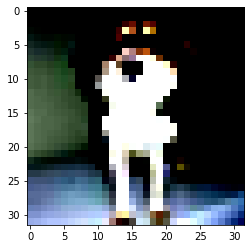

In [45]:
import matplotlib.pyplot as plt
fig=plt.figure()
train.loader
for x,y in train_loader:
  xx=torch.movedim(x[0], (0,1,2), (2,0,1))
  print(xx)
  plt.imshow(xx)
  break